# Chatbot Mejorado

In [1]:
# Instalar la biblioteca de Hugging Face y spacy
!pip install transformers spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bigscience/bloomz-1b1")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-1b1")

In [3]:
!python -m spacy download es_core_news_sm
import es_core_news_sm
nlp = es_core_news_sm.load()

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-17 13:00:08.270743: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 1.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
# Definimos una función que procesa la respuesta del modelo y reemplaza las entidades nombradas por su descripción más detallada
def procesar_respuesta(respuesta):
  # Primero, procesamos la respuesta con spacy para detectar entidades nombradas
  doc = nlp(respuesta)

  # Luego, reemplazamos cada entidad nombrada por su descripción más detallada
  for ent in doc.ents:
    respuesta = respuesta.replace(ent.text, ent.description)

  # Finalmente, devolvemos la respuesta procesada
  return respuesta


In [5]:
# Obtener la respuesta del modelo a la pregunta "¿...?"
input_text = "¿Por que el cielo es azul?"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
outputs = model.generate(input_ids)


/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [6]:
# Decodificar la respuesta del modelo y procesarla con la función procesar_respuesta
respuesta = tokenizer.decode(outputs[0])
respuesta_procesada = procesar_respuesta(respuesta)

# Mostrar la respuesta procesada en pantalla
print(respuesta_procesada)

¿Por que el cielo es azul? El cielo es azul porque hay una fuente de luz.</s>


# Resultado:
Con el recurso disponible es es el mejor resultado que me dio.

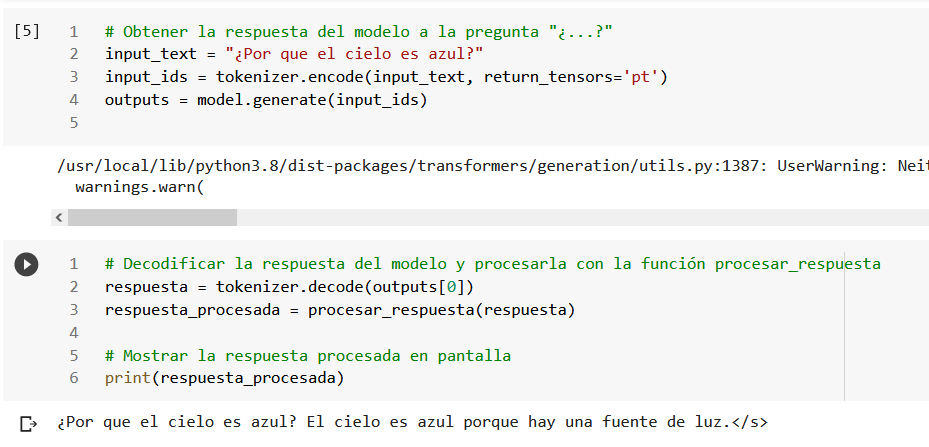